In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, log_loss, make_scorer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [31]:
data = pd.read_csv('../data/churn.csv')

In [32]:
data

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,5.63,4.2,5.0,1.00,King's Landing,2014-06-05,iPhone,2014-01-25,0.0,0,False,100.0
49996,0.00,4.0,NaN,1.00,Astapor,2014-01-25,iPhone,2014-01-24,0.0,1,False,0.0
49997,3.86,5.0,5.0,1.00,Winterfell,2014-05-22,Android,2014-01-31,0.0,0,True,100.0
49998,4.58,3.5,3.0,1.00,Astapor,2014-01-15,iPhone,2014-01-14,0.0,2,False,100.0


In [33]:
data.shape

(50000, 12)

In [34]:
data_month = date_to_month(data, 'last_trip_date')

In [35]:
data_month

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,month
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,6
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,5
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,1
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,6
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,5.63,4.2,5.0,1.00,King's Landing,2014-06-05,iPhone,2014-01-25,0.0,0,False,100.0,6
49996,0.00,4.0,NaN,1.00,Astapor,2014-01-25,iPhone,2014-01-24,0.0,1,False,0.0,1
49997,3.86,5.0,5.0,1.00,Winterfell,2014-05-22,Android,2014-01-31,0.0,0,True,100.0,5
49998,4.58,3.5,3.0,1.00,Astapor,2014-01-15,iPhone,2014-01-14,0.0,2,False,100.0,1


1. clean up
2. choose models, noting hyperparameters
3. create a reporting process
4. 

In [ ]:
# def plot_stage_score(ax, estimator, X_train, y_train, X_test, y_test):
#     '''
#     Parameters: ax: a Matplotlib axis object, on which the graph will be plotted
#                 estimator: GradientBoostingRegressor
#                 X_train: 2d numpy array
#                 y_train: 1d numpy array
#                 X_test: 2d numpy array
#                 y_test: 1d numpy array

#     Returns: A plot of the number of iterations vs the MSE for the model for
#     both the training set and test set.
#     '''
#     model = estimator
#     model.fit(X_train, y_train)
#     iters = []
#     MSE = []
#     for i, predict in enumerate(model.staged_predict(X_test)):
#         iters.append(i)
#         MSE.append(mean_squared_error(y_test, predict))
#     ax.plot(iters, MSE)

In [125]:
churn = pd.read_csv('../data/churn.csv')
#Simple mean impute for ratings columns
imp = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imp.fit(churn[['avg_rating_by_driver','avg_rating_of_driver']])
churn_imp = imp.transform(churn[['avg_rating_by_driver','avg_rating_of_driver']])
pd.DataFrame(churn_imp)
churn[['avg_rating_by_driver','avg_rating_of_driver']]=churn_imp
churn

#encode non-null values: https://towardsdatascience.com/preprocessing-encode-and-knn-impute-all-categorical-features-fast-b05f50b4dfaa 
encoder = OrdinalEncoder()
#imputer = KNN()
cat_cols = ['phone']

def encode(data):
    '''function to encode non-null data and replace it in the original data'''
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data


for columns in cat_cols:
    encode(churn[columns])

def churn_(df, column):
    dates = df[column]
    cutoff_date = '2014-06-01'
    array = []
    for date in dates:
        if date > cutoff_date:
            array.append(1)
        else:
            array.append(0)
    df['active'] = array
    return df


churn = churn_(churn, 'last_trip_date')


#KNN impute for phone column
imputer = KNNImputer(n_neighbors=5, weights="uniform")
churn_imp2=imputer.fit_transform(churn[['avg_rating_by_driver','avg_rating_of_driver','phone']])
churn[['avg_rating_by_driver','avg_rating_of_driver','phone']]=churn_imp2


# creating instance of one-hot-encoder 
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(churn[['city']]).toarray())
churn = churn.join(enc_df)
churn = churn.drop(['city'],axis =1)

#create feature with difference between signup and last trip
churn['last_trip_date_d'] = pd.to_datetime(churn['last_trip_date'])
churn['signup_date_d'] = pd.to_datetime(churn['signup_date'])
churn['date_delta'] = churn['last_trip_date_d']-churn['signup_date_d']

churn = churn.rename(columns = {0:'city_0', 1:'city_1',2:'city_2'},errors = 'raise')

def date_to_month(df, column_name):
    df[column_name] = pd.to_datetime(df[column_name])
    df['month '+ column_name] = df[column_name].dt.month
    return df

date_to_month(churn, 'signup_date')
churn = churn.drop(['signup_date'],axis =1)
date_to_month(churn, 'last_trip_date')
churn = churn.drop(['last_trip_date'], axis = 1)
churn = churn.drop(['last_trip_date_d'], axis = 1)
churn = churn.drop(['signup_date_d'], axis = 1)
churn = churn.drop(['month signup_date'], axis = 1)
churn = churn.drop(['date_delta'], axis = 1)
churn = churn.drop(['month last_trip_date'], axis = 1)
churn
y = churn.pop('active')
X = churn

/home/daniel/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [126]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=1)
model = RandomForestClassifier(n_estimators=100, max_depth=None, max_features='auto')
model.fit(X_train, y_train)


RandomForestClassifier()

In [127]:
y_test_hat = model.predict(X_test)

print(f'Accurancy is :{model.score(X_test,y_test)}')

Accurancy is :0.7602


In [130]:
model = RandomForestClassifier()

grid = {'n_estimators': [100,200,500],
        'max_depth': [ 2, 4, 8,16,32]}

gb_gridsearch = GridSearchCV(estimator=model, param_grid=grid, 
                             cv=5, verbose=0, return_train_score=True)

gb_gridsearch.fit(X_train, y_train)

df_grid = pd.DataFrame(gb_gridsearch.cv_results_)



In [132]:
df_grid.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.626730,0.010136,0.039415,0.001551,2,100,"{'max_depth': 2, 'n_estimators': 100}",0.739571,0.730429,0.727429,...,0.730057,0.004981,14,0.731964,0.731714,0.729000,0.729036,0.729464,0.730236,0.001322
1,1.213841,0.031433,0.072412,0.001242,2,200,"{'max_depth': 2, 'n_estimators': 200}",0.737429,0.735143,0.727286,...,0.731143,0.004269,13,0.730679,0.734107,0.729571,0.730821,0.731929,0.731421,0.001537
2,2.952895,0.047735,0.170429,0.003163,2,500,"{'max_depth': 2, 'n_estimators': 500}",0.735000,0.729714,0.727429,...,0.729571,0.002968,15,0.728429,0.730714,0.731071,0.731107,0.728893,0.730043,0.001146
3,0.849725,0.012995,0.048743,0.000741,4,100,"{'max_depth': 4, 'n_estimators': 100}",0.766429,0.758714,0.754429,...,0.758571,0.004156,11,0.763857,0.766214,0.756964,0.760464,0.757964,0.761093,0.003496
4,1.697790,0.031664,0.092868,0.001844,4,200,"{'max_depth': 4, 'n_estimators': 200}",0.766000,0.750000,0.762571,...,0.758343,0.005626,12,0.762071,0.758464,0.761786,0.761071,0.756000,0.759879,0.002320


In [135]:
max_scores = df_grid.groupby(['param_max_depth', 
                                    'param_n_estimators']).max()  # it doesnt matter what this is, there is only one value

max_scores = max_scores.unstack()[['mean_test_score', 'mean_train_score']]

max_scores

mean_test_score                     mean_train_score  \
param_n_estimators             100       200       500              100   
param_max_depth                                                           
2                         0.730057  0.731143  0.729571         0.730236   
4                         0.758571  0.758343  0.759143         0.761093   
8                         0.786429  0.787171  0.787486         0.802029   
16                        0.780257  0.781886  0.781743         0.937450   
32                        0.761857  0.761857  0.763143         0.997800   

                                        
param_n_estimators       200       500  
param_max_depth                         
2                   0.731421  0.730043  
4                   0.759879  0.761436  
8                   0.802086  0.802193  
16                  0.937679  0.938336  
32                  0.997879  0.997879

In [153]:
best_model = gb_gridsearch.best_estimator_
print(f' Best model accuracy: {gb_gridsearch.best_score_}')

 Best model accuracy: 0.7874857142857143


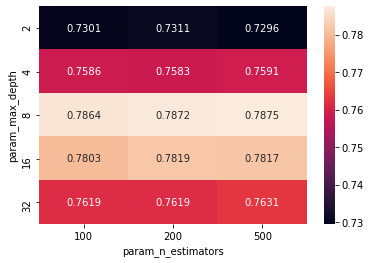

In [154]:
import seaborn as sns 
sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g');

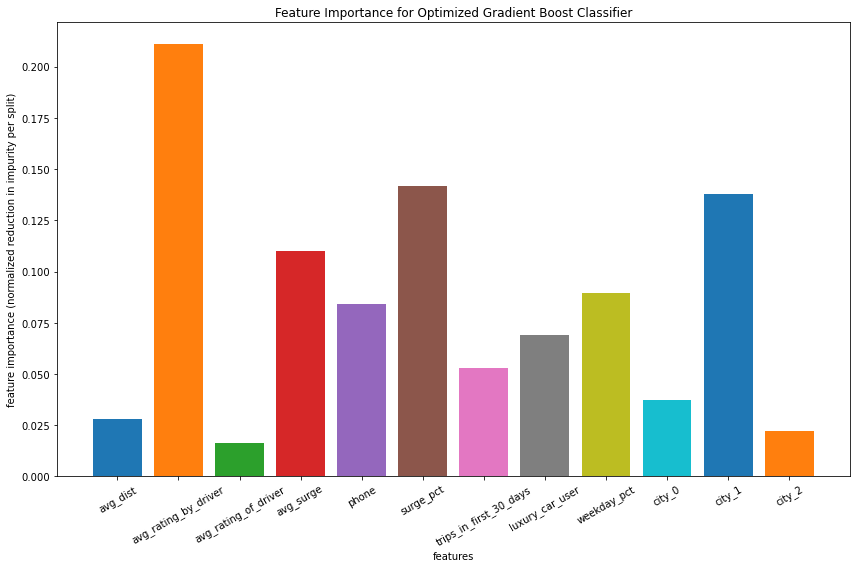

In [144]:
fig, ax = plt.subplots(figsize=(12,8))
for i,n in enumerate(X.columns):
    ax.bar(n, best_model.feature_importances_[i])
ax.set_xlabel('features')
ax.set_ylabel('feature importance (normalized reduction in impurity per split)')
ax.set_title('Feature Importance for Optimized Gradient Boost Classifier')
plt.xticks(rotation = 30)
plt.tight_layout()

In [ ]:
num_trees = range(5, 500, 25)
accuracies = []
for n in num_trees:
    tot = 0
    for i in range(5):
        rf = RandomForestClassifier(n_estimators=n)
        rf.fit(X_train, y_train)
        tot += rf.score(X_test, y_test)
    accuracies.append(tot / 5)
    
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(num_trees, accuracies)
ax.set_xlabel("Number of Trees")
ax.set_ylabel("Accuracy")
ax.set_title('Accuracy vs. Num Trees')